# Лабораторна робота 2.

## Створення штучно синтезованих наборів даних

**Лабораторна робота виконується індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Завдання 1: Синтезувати набір даних, який складається з двох лінійно роздільних множин, що можуть бути використані для навчання моделей класифікації.**


**Роз'яснення до завдання 1:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Обидва класи мають бути лінійно роздільні, тобто можна знайти таку пряму, яка розділяє дані двох класів без помилок.
   - Дані повинні бути рівномірно розподілені по всьому простору, але з певним відхиленням для забезпечення реалістичності.
   - Можливі варіанти синтезу:
     - Використання нормального розподілу для генерації точок навколо центроїдів двох класів.
     - Додавання невеликого шуму до кожного класу для забезпечення варіативності даних.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Перевірка лінійної роздільності: Побудуйте графік з нанесеними точками і покажіть лінію, яка розділяє два класи.

5. **Додаткові умови:**
- Зробіть аналіз набору даних, побудувавши гістограми розподілу даних для кожного класу окремо.
- Опишіть підходи, які використовувалися для створення набору даних.

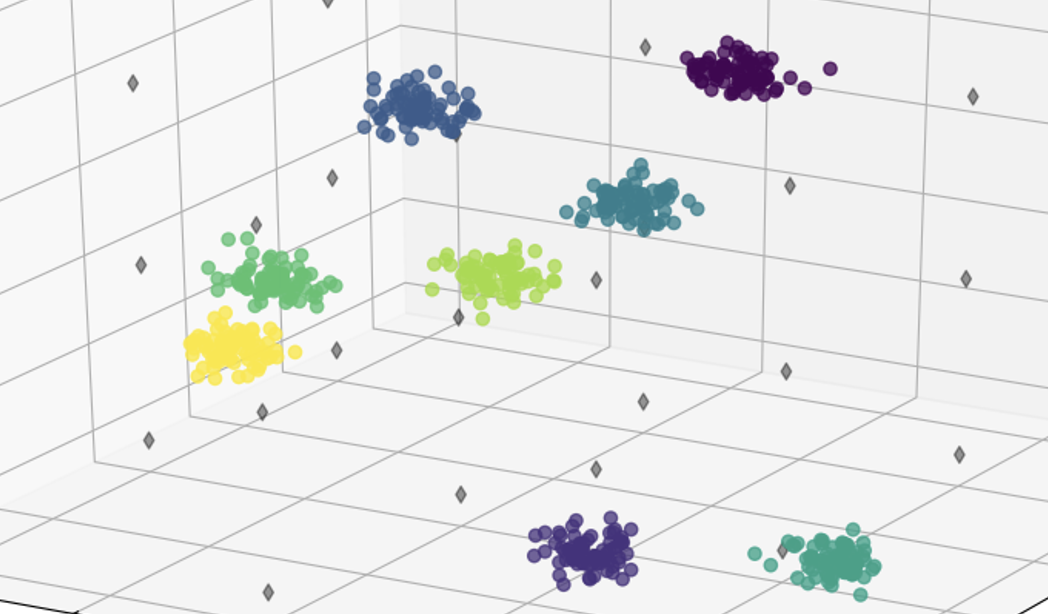

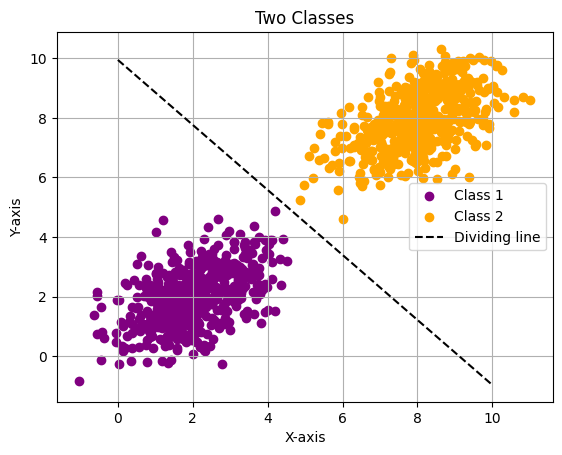

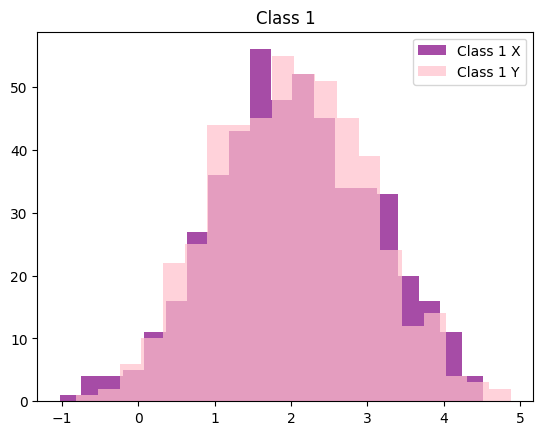

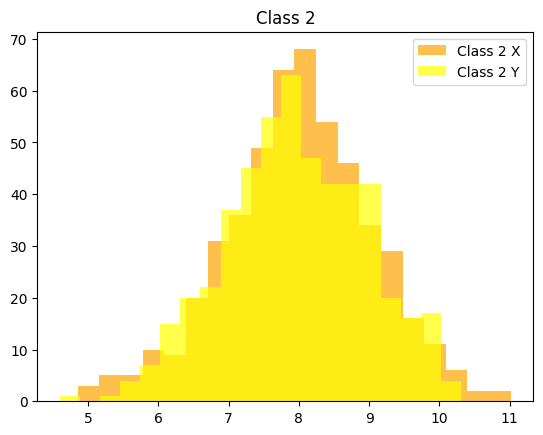

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC

n_points = 500
class11 = [2, 2]
class22 = [8, 8]
covariance = [[1, 0.5], [0.5, 1]]

class1 = np.random.multivariate_normal(class11, covariance, n_points)
class2 = np.random.multivariate_normal(class22, covariance, n_points)

lClass1 = np.zeros(n_points)
lClass2 = np.ones(n_points)

X = np.vstack((class1, class2))
y = np.hstack((lClass1, lClass2))

model = SVC(kernel='linear')
model.fit(X, y)

pd.DataFrame(np.column_stack((X, y)), columns=['x', 'y', 'class']).to_csv('lab2.csv', index=False)

plt.scatter(class1[:, 0], class1[:, 1], color='purple', label='Class 1')
plt.scatter(class2[:, 0], class2[:, 1], color='orange', label='Class 2')

w, b = model.coef_[0], model.intercept_[0]
x_vals = np.linspace(0, 10, 100)
plt.plot(x_vals, -(w[0] * x_vals + b) / w[1], 'k--', label='Dividing line')

plt.title('Two Classes')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

plt.hist(class1[:, 0], bins=20, alpha=0.7, color='purple', label='Class 1 X')
plt.hist(class1[:, 1], bins=20, alpha=0.7, color='pink', label='Class 1 Y')
plt.title('Class 1')
plt.legend()
plt.show()

plt.hist(class2[:, 0], bins=20, alpha=0.7, color='orange', label='Class 2 X')
plt.hist(class2[:, 1], bins=20, alpha=0.7, color='yellow', label='Class 2 Y')
plt.title('Class 2')
plt.legend()
plt.show()


**Завдання 2: Синтезувати набір даних, який складається з трьох множин (класів), що мають часткове перекриття, для використання в задачах класифікації та аналізу даних.**

**Роз'яснення до завдання 2:**

1. **Опис набору даних:**
   - Набір даних повинен містити три класифікаційні мітки (клас 1, клас 2, клас 3).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані мають утворювати три множини, кожна з яких розподілена навколо свого центру, але з перекриттям з іншими множинами.
   - Кожен клас повинен мати певну ступінь перекриття з іншими класами, що призводить до часткової змішуваності точок з різними мітками.
   - Можливі варіанти синтезу:
     - Використання нормального розподілу для генерації точок навколо центроїдів кожного класу.
     - Додавання більшого шуму або кореляції між точками для збільшення ступеня перекриття.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **300** для кожного класу (всього **900**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **900** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для всіх трьох класів, щоб візуалізувати перекриття множин.
   - Перевірте, чи дійсно дані утворюють перекриття між класами, показавши частку точок, які належать до зон перекриття.

5. **Додаткові умови:**
   - Побудуйте кореляційні графіки та гістограми розподілу для кожного класу.
   - Опишіть підходи, які використовувалися для створення набору даних, і обґрунтуйте вибір параметрів.

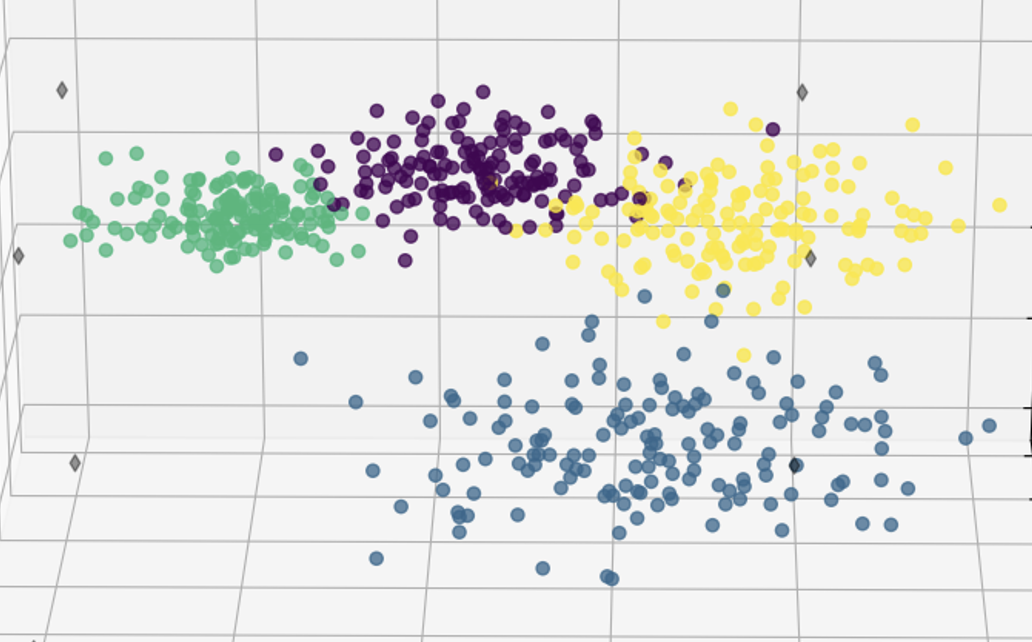

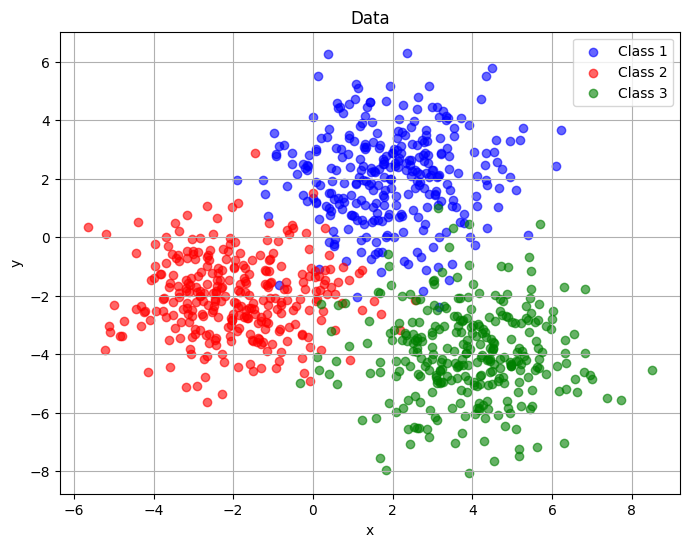

In [10]:
n_points = 300
std_dev_overlap = 1.5

class1 = [2, 2]
class2 = [-2, -2]
class3 = [4, -4]

class1Points = np.random.normal(class1, std_dev_overlap, size=(n_points, 2))
class2Points = np.random.normal(class2, std_dev_overlap, size=(n_points, 2))
class3Points = np.random.normal(class3, std_dev_overlap, size=(n_points, 2))

class1_labels = np.ones(n_points) * 1
class2_labels = np.ones(n_points) * 2
class3_labels = np.ones(n_points) * 3

dataClass1 = np.column_stack((class1Points, class1_labels))
dataClass2 = np.column_stack((class2Points, class2_labels))
dataClass3 = np.column_stack((class3Points, class3_labels))

data = np.vstack((dataClass1, dataClass2, dataClass3))

df = pd.DataFrame(data, columns=['x', 'y', 'class'])
df.to_csv('lab2.cvs', index=False)

plt.figure(figsize=(8, 6))

plt.scatter(class1Points[:, 0], class1Points[:, 1], color='blue', label='Class 1', alpha=0.6)

plt.scatter(class2Points[:, 0], class2Points[:, 1], color='red', label='Class 2', alpha=0.6)

plt.scatter(class3Points[:, 0], class3Points[:, 1], color='green', label='Class 3', alpha=0.6)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Data')
plt.legend()
plt.grid(True)
plt.show()


**Завдання 3: Синтезувати набір даних, який складається з двох множин у формі "тор в торі", де одна множина має форму внутрішнього тора, а інша — зовнішнього тора.**

**Роз'яснення до завдання 3:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані повинні утворювати дві множини у формі тора: одна множина повинна бути розташована всередині іншої (тобто, "тор в торі").
   - Внутрішній тор (клас 1) повинен мати менший радіус і ширину, ніж зовнішній тор (клас 2).
   - Розподіл точок повинен бути рівномірним вздовж кожного тора з додаванням невеликого шуму для забезпечення варіативності.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y) $і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для обох класів, щоб візуалізувати форму "тор в торі".
   - Перевірте розподіл точок уздовж кожного тора, побудувавши радіальні гістограми для кожного класу.

5. **Додаткові умови:**
   - Побудуйте окремі графіки, які демонструють розподіл даних для кожного тора окремо.
   - Опишіть процес генерації даних та поясніть вибір параметрів для кожного тора.

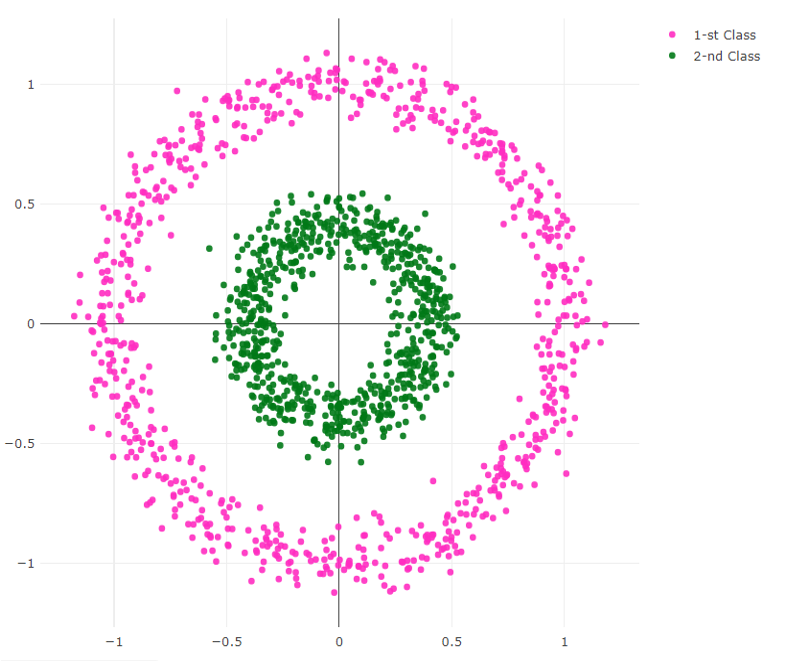

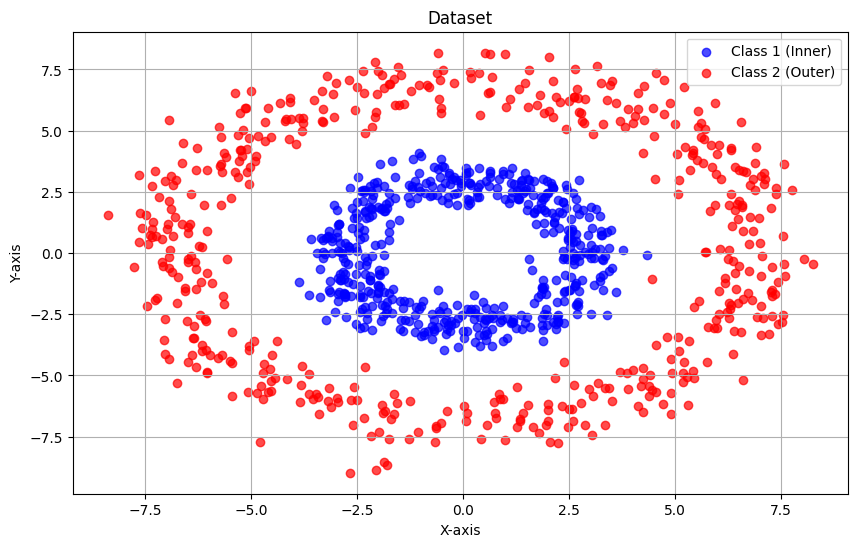

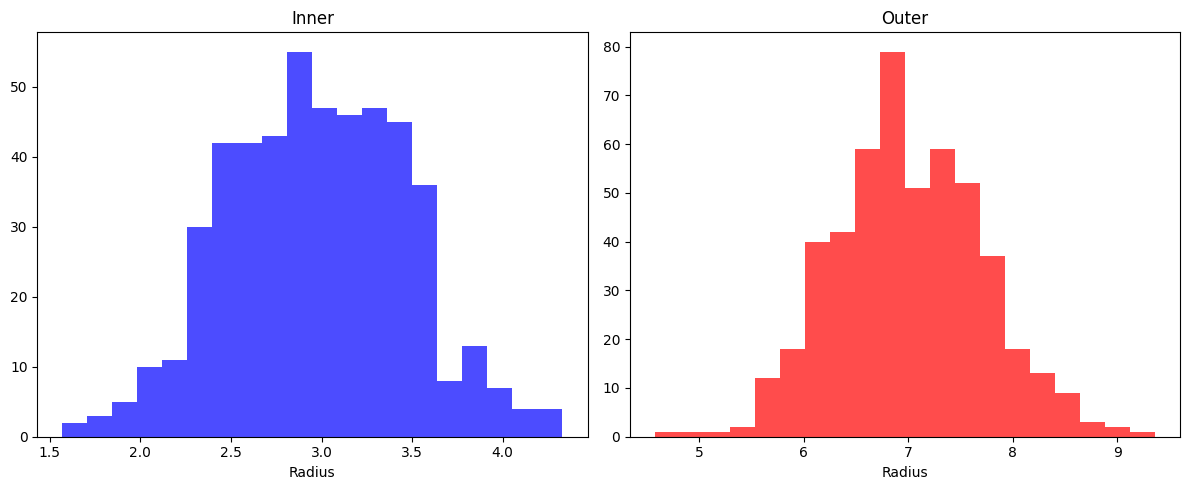

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

n_points = 500 

radius1 = 3.0
width1 = 0.5

radius2 = 7.0
width2 = 0.7

inner1 = np.random.uniform(0, 2 * np.pi, n_points)
inner2 = np.random.normal(radius1, width1, n_points)
class1_x = inner2 * np.cos(inner1)
class1_y = inner2 * np.sin(inner1)
lClass1 = np.zeros(n_points)

outer1 = np.random.uniform(0, 2 * np.pi, n_points)
outer2 = np.random.normal(radius2, width2, n_points)
class2_x = outer2 * np.cos(outer1)
class2_y = outer2 * np.sin(outer1)
lClass2 = np.ones(n_points)

X = np.vstack((np.column_stack((class1_x, class1_y)),
               np.column_stack((class2_x, class2_y))))
y = np.hstack((lClass1, lClass2))

df = pd.DataFrame(np.column_stack((X, y)), columns=['x', 'y', 'class'])
df['class'] = df['class'].astype(int)
df.to_csv('lab2.csv', index=False)

plt.figure(figsize=(10, 6))
plt.scatter(class1_x, class1_y, color='blue', label='Class 1 (Inner)', alpha=0.7)
plt.scatter(class2_x, class2_y, color='red', label='Class 2 (Outer)', alpha=0.7)

plt.title('Dataset')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.hist(inner2, bins=20, alpha=0.7, color='blue', label='Inner')
ax1.set_title('Inner')
ax1.set_xlabel('Radius')

ax2.hist(outer2, bins=20, alpha=0.7, color='red', label='Outer')
ax2.set_title('Outer')
ax2.set_xlabel('Radius')

plt.tight_layout()
plt.show()


**Завдання 4: Синтезувати набір даних, який складається з двох множин, що утворюють подвійну спіраль, де одна спіраль огортає іншу.**

**Роз'яснення до завдання 4:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані повинні утворювати дві спіралі, закручені одна в іншу, так щоб кожна спіраль відповідала одному з класів.
   - Спіралі повинні мати протилежні напрямки закручування (одна за годинниковою стрілкою, інша — проти).
   - Кожна спіраль повинна бути рівномірно заповнена точками з невеликим додаванням шуму для варіативності даних.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для обох спіралей, щоб візуалізувати структуру "спіраль у спіралі".
   - Проаналізуйте відмінності у розподілі точок для обох класів та оцініть складність їх розділення.

5. **Додаткові умови:**
   - Створіть окремі графіки, що показують як закручується кожна спіраль.
   - Опишіть процес генерації даних, включаючи параметри, що використовувалися для визначення форми спіралей.

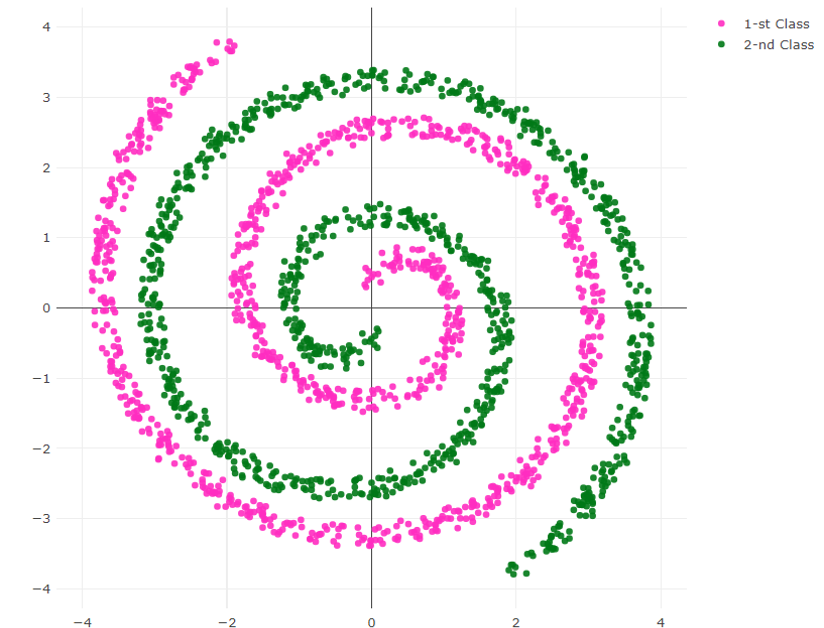

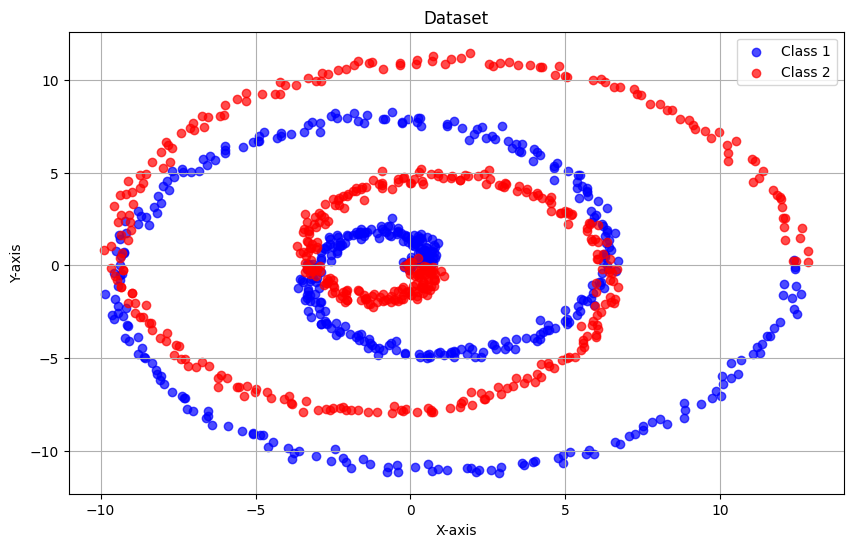

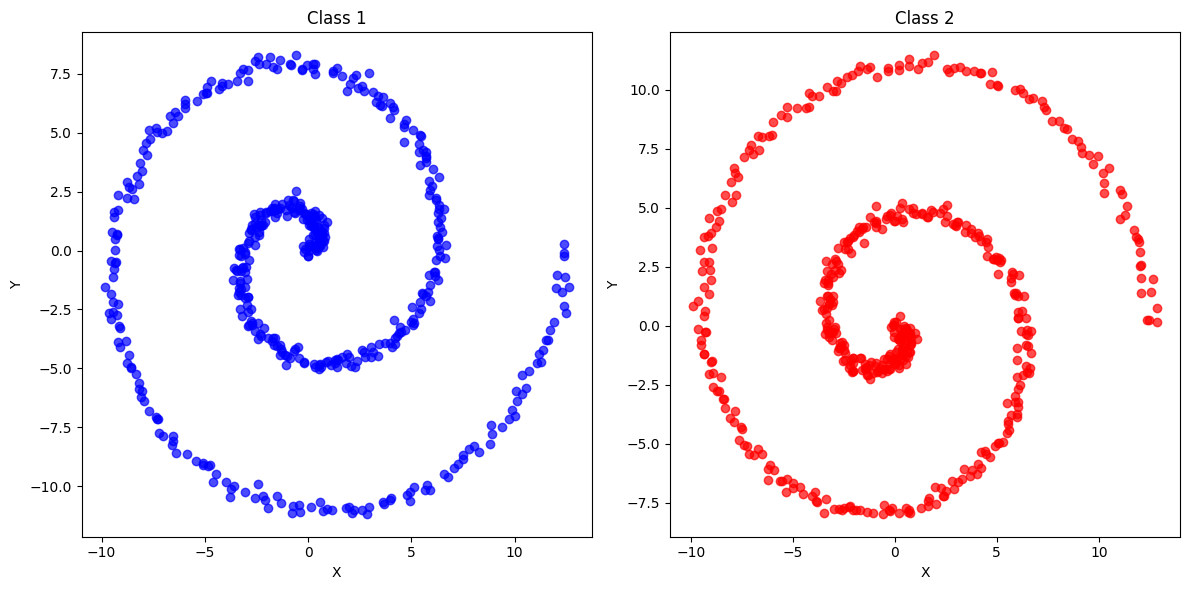

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

n_points = 500 
noise = 0.2

tClass1 = np.linspace(0, 4 * np.pi, n_points)
rClass1 = tClass1
xClass1 = rClass1 * np.cos(tClass1) + np.random.normal(0, noise, n_points)
yClass1 = rClass1 * np.sin(tClass1) + np.random.normal(0, noise, n_points)
labels_class1 = np.zeros(n_points)

tClass2 = np.linspace(0, 4 * np.pi, n_points)
rClass2 = tClass2
xClass2 = rClass2 * np.cos(-tClass2) + np.random.normal(0, noise, n_points)
yClass2 = rClass2 * np.sin(-tClass2) + np.random.normal(0, noise, n_points)
labels_class2 = np.ones(n_points)

X = np.vstack((np.column_stack((xClass1, yClass1)),
               np.column_stack((xClass2, yClass2))))
y = np.hstack((labels_class1, labels_class2))

df = pd.DataFrame(np.column_stack((X, y)), columns=['x', 'y', 'class'])
df['class'] = df['class'].astype(int)
df.to_csv('lab2.csv', index=False)

plt.figure(figsize=(10, 6))
plt.scatter(xClass1, yClass1, color='blue', label='Class 1', alpha=0.7)
plt.scatter(xClass2, yClass2, color='red', label='Class 2', alpha=0.7)

plt.title('Dataset')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(xClass1, yClass1, color='blue', alpha=0.7)
ax1.set_title('Class 1')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')

ax2.scatter(xClass2, yClass2, color='red', alpha=0.7)
ax2.set_title('Class 2')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')

plt.tight_layout()
plt.show()


**Завдання 5: Синтезувати кілька наборів даних, що описують траєкторії системи Лоренца з різними параметрами, дослідити вплив параметрів на динаміку системи та візуалізувати результати.**


### 5.1: Теоретичне підґрунтя

**Опис системи Лоренца:**
Система Лоренца — це набір трьох нелінійних диференціальних рівнянь, що описують динаміку тривимірної системи з хаотичною поведінкою. Вона визначається такими рівняннями:

$$
\frac{dx}{dt} = \sigma (y - x)
$$

$$
\frac{dy}{dt} = x (\rho - z) - y
$$

$$
\frac{dz}{dt} = xy - \beta z
$$

Де:
- $(x, y, z)$ — змінні стану системи.
- $\sigma$ — параметр, що відповідає за швидкість зміни (часто називають "параметр Прандтля").
- $\rho$ — параметр, що відповідає за різницю температур у системі (відповідає за інтенсивність конвекції).
- $\beta$  — параметр, що відповідає за співвідношення розмірів.

**Роз'яснення до завдання:**
- Згенерувати дані для системи Лоренца за допомогою різних значень параметрів $\sigma$, $\rho$ та $\beta$.
- Проаналізувати вплив зміни параметрів на траєкторії системи.
- Візуалізувати результати в тривимірному просторі для кожного набору даних.

### 5.2: Генерація та візуалізація набору даних

**Що треба зробити:**

1. **Генерація даних:**
   - Вибрати декілька різних комбінацій параметрів $\sigma$, $\rho$ та $\beta$.
   - Використовуючи числовий метод (наприклад, метод Рунге-Кутти 4-го порядку), згенерувати траєкторії системи Лоренца для кожного набору параметрів.

2. **Візуалізація:**
   - Для кожного набору параметрів побудувати тривимірні графіки траєкторій.
   - Відобразити траєкторії в просторі $(x, y, z)$.

3. **Аналіз:**
   - Порівняти результати для різних наборів параметрів.
   - Описати, як зміна кожного з параметрів впливає на поведінку системи (наприклад, перехід від стабільного до хаотичного режиму).

**Очікуваний результат:**
- Кілька наборів даних, що описують траєкторії системи Лоренца з різними параметрами (мінімум 3).
- Візуалізації цих траєкторій у тривимірному просторі.
- Аналіз і опис впливу параметрів на динаміку системи.

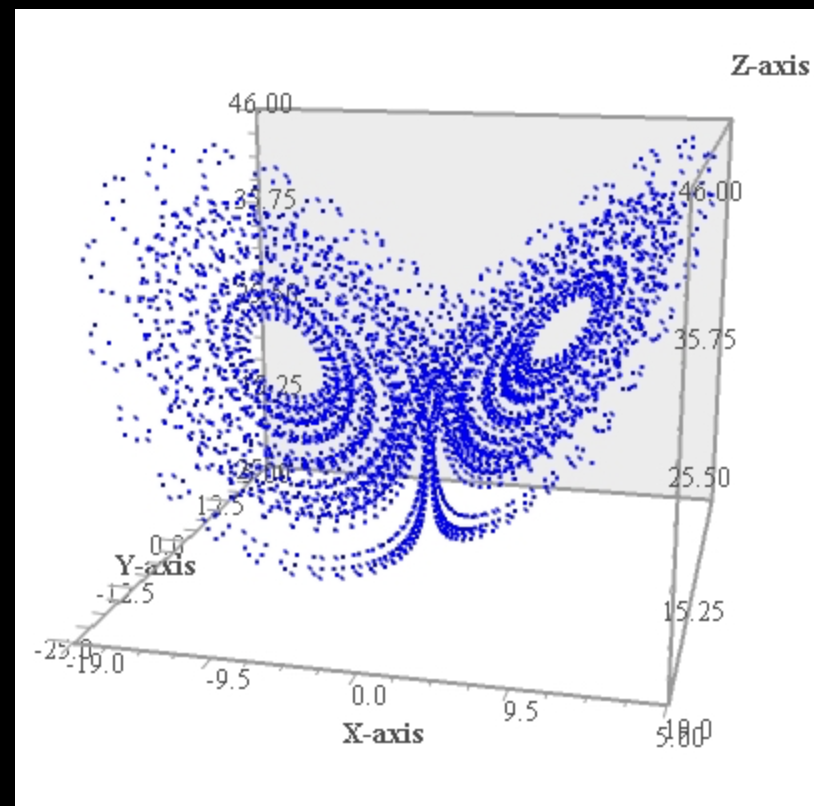

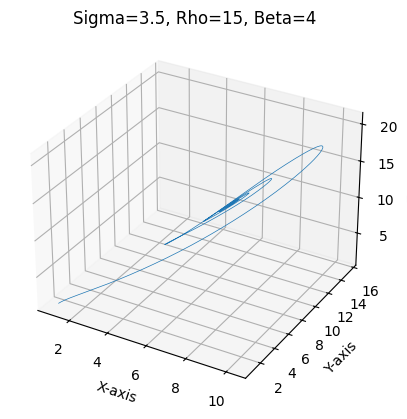

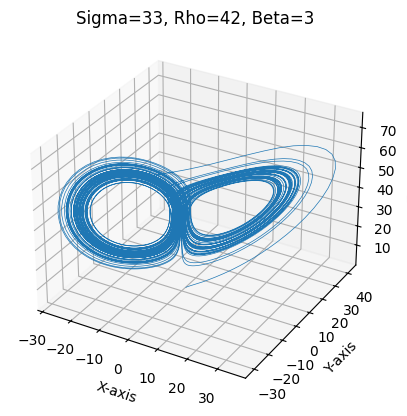

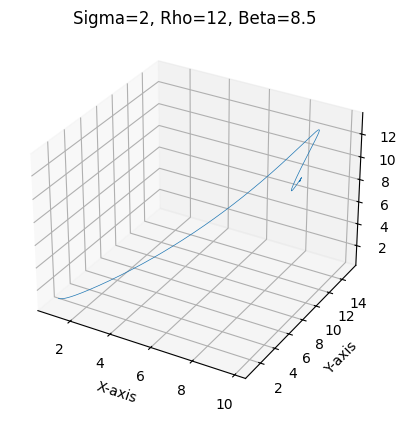

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def lorentz(t, state, sigma, rho, beta):
    x, y, z = state
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
    return [dx, dy, dz]

def trajectory2(sigma, rho, beta, time_interval, initial_state):
    times = np.linspace(time_interval[0], time_interval[1], 10000)
    solution = solve_ivp(
        fun=lambda t, state: lorentz(t, state, sigma, rho, beta),
        t_span=time_interval,
        y0=initial_state,
        t_eval=times
    )
    return solution.t, solution.y

def create_plot(times, state, plot_title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(state[0], state[1], state[2], lw=0.5)
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    ax.set_title(plot_title)
    plt.show()

params = [
    (3.5, 15, 4),
    (33, 42, 3),
    (2, 12, 8.5)
]

initial_conditions = [1, 1, 1]
time_range = (0, 50)

for sigma, rho, beta in params:
    time, trajectory = trajectory2(sigma, rho, beta, time_range, initial_conditions)
    title = f'Sigma={sigma}, Rho={rho}, Beta={beta}'
    create_plot(time, trajectory, title)


In [ ]:
#code

In [ ]:
#code

In [ ]:
#code